In [0]:
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

#PATH of the project folder
PROJECT_ROOT_DIR=os.getcwd()

#Create Images folder
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"Images")
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

#Function to save figures in the images folder
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(IMAGES_PATH, fig_id + ".png")
    print("Figure {} saved".format(fig_id))
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
IMAGES_PATH

'/content/Images'

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"clementdessole","key":"fb9413e94ed984fe745cea54517416f0"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!pip install kaggle
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

100% 2.35G/2.37G [00:20<00:00, 111MB/s]
100% 2.37G/2.37G [00:21<00:00, 121MB/s]


In [0]:
!unzip weed-detection-in-soybean-crops.zip

In [0]:
!rm -r ./dataset/broadleaf
!rm -r ./dataset/grass
!rm -r ./dataset/soil
!rm -r ./dataset/soybean

In [0]:
classes = ['broadleaf', 'grass', 'soil', 'soybean'] 
data_dir = '/content/dataset/dataset/'
broadleaf_dir=os.path.join(data_dir,classes[0])
grass_dir=os.path.join(data_dir,classes[1])
soil_dir=os.path.join(data_dir,classes[2])
soybean_dir=os.path.join(data_dir,classes[3])

In [11]:
print(classes[0],": ",len([f for f in os.listdir(broadleaf_dir) if not f.startswith('.')]))
print(classes[1],": ",len([f for f in os.listdir(grass_dir) if not f.startswith('.')]))
print(classes[2],": ",len([f for f in os.listdir(soil_dir) if not f.startswith('.')]))
print(classes[3],": ",len([f for f in os.listdir(soybean_dir) if not f.startswith('.')]))

broadleaf :  1191
grass :  3520
soil :  3249
soybean :  7376


In [0]:
def image_random(folder,nbr_img):
    name_image=[]
    nbr_index=[]
    for i in range(nbr_img):
        unique=True
        path = folder
        files = [f for f in os.listdir(path) if not f.startswith('.')]
        while unique:
            index = random.randrange(0, len(files))
            if index not in nbr_index:
                nbr_index.append(index)
                unique=False
        name_image.append(files[index])
    return name_image

In [0]:
broadleaf_images=image_random(broadleaf_dir,3)
grass_images=image_random(grass_dir,3)
soil_images=image_random(soil_dir,3)
soybean_images=image_random(soybean_dir,3)

In [0]:
def visualization_image(files,sizeh,sizev,folder,name):
    length=len(files)
    plt.figure(figsize=(sizeh,sizev))
    for each in range(len(files)):
        plt.subplot(1,length,each+1)
        imgplot=mpimg.imread(folder+'/'+files[each])
        plt.imshow(imgplot,cmap='gray')
        plt.title('{}'.format(files[each],size=14))
    plt.tight_layout()
    save_fig(name+'_Images')
    plt.show()

Figure broadleaf_Images saved


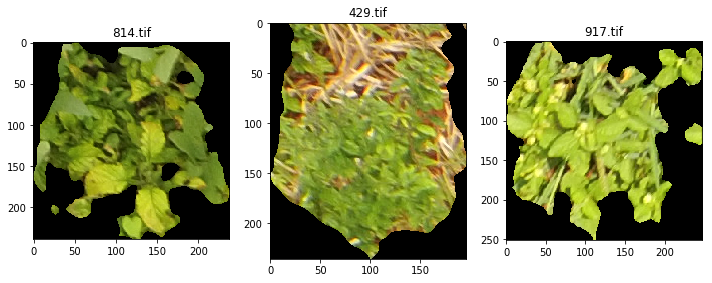

Figure grass_Images saved


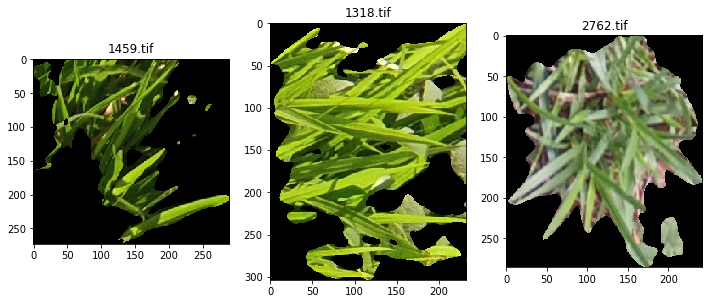

Figure soil_Images saved


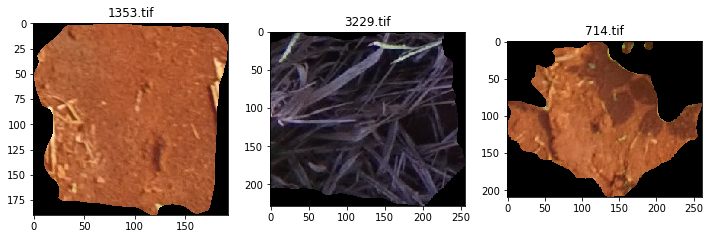

Figure soybean_Images saved


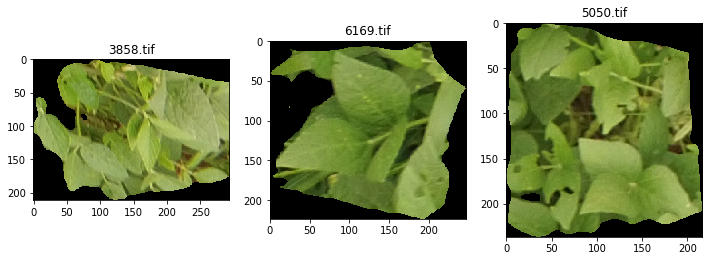

In [15]:
visualization_image(broadleaf_images,10,10,broadleaf_dir,'broadleaf')
visualization_image(grass_images,10,10,grass_dir,'grass')
visualization_image(soil_images,10,10,soil_dir,'soil')
visualization_image(soybean_images,10,10,soybean_dir,'soybean')

In [0]:
base_dir='/content/Data'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

In [0]:
base_dir='/content/Data'
try:
    os.mkdir(base_dir)
except:
    print('already created')

In [0]:
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [0]:
train_broadleaf_dir=os.path.join(train_dir,'broadleaf')
os.mkdir(train_broadleaf_dir)
train_grass_dir=os.path.join(train_dir,'grass')
os.mkdir(train_grass_dir)
train_soil_dir=os.path.join(train_dir,'soil')
os.mkdir(train_soil_dir)
train_soybean_dir=os.path.join(train_dir,'soybean')
os.mkdir(train_soybean_dir)

validation_broadleaf_dir=os.path.join(validation_dir,'broadleaf')
os.mkdir(validation_broadleaf_dir)
validation_grass_dir=os.path.join(validation_dir,'grass')
os.mkdir(validation_grass_dir)
validation_soil_dir=os.path.join(validation_dir,'soil')
os.mkdir(validation_soil_dir)
validation_soybean_dir=os.path.join(validation_dir,'soybean')
os.mkdir(validation_soybean_dir)

test_broadleaf_dir=os.path.join(test_dir,'broadleaf')
os.mkdir(test_broadleaf_dir)
test_grass_dir=os.path.join(test_dir,'grass')
os.mkdir(test_grass_dir)
test_soil_dir=os.path.join(test_dir,'soil')
os.mkdir(test_soil_dir)
test_soybean_dir=os.path.join(test_dir,'soybean')
os.mkdir(test_soybean_dir)

In [55]:
print(classes[0],": ",len([f for f in os.listdir(broadleaf_dir) if not f.startswith('.')]))
print(classes[1],": ",len([f for f in os.listdir(grass_dir) if not f.startswith('.')]))
print(classes[2],": ",len([f for f in os.listdir(soil_dir) if not f.startswith('.')]))
print(classes[3],": ",len([f for f in os.listdir(soybean_dir) if not f.startswith('.')]))

broadleaf :  1191
grass :  3520
soil :  3249
soybean :  7376


In [0]:
b_len=len([f for f in os.listdir(broadleaf_dir) if not f.startswith('.')])
g_len=len([f for f in os.listdir(grass_dir) if not f.startswith('.')])
soil_len=len([f for f in os.listdir(soil_dir) if not f.startswith('.')])
soy_len=len([f for f in os.listdir(soybean_dir) if not f.startswith('.')])

In [0]:
first_b=int(np.ceil(b_len*.8))
second_b=int(np.ceil((b_len-first_b)/2+first_b))

first_g=int(np.ceil(g_len*.8))
second_g=int(np.ceil((g_len-first_g)/2+first_g))

first_soil=int(np.ceil(soil_len*.8))
second_soil=int(np.ceil((soil_len-first_soil)/2+first_soil))

first_soy=int(np.ceil(soy_len*.8))
second_soy=int(np.ceil((soy_len-first_soy)/2+first_soy))

In [58]:
print("broadleaf:",first_b,second_b,b_len)
print("grass:",first_g,second_g,g_len)
print("soil:",first_soil,second_soil,soil_len)
print("soybean:",first_soy,second_soy,soy_len)

broadleaf: 953 1072 1191
grass: 2816 3168 3520
soil: 2600 2925 3249
soybean: 5901 6639 7376


In [0]:
def data_creation(first_pos,second_pos,final_pos,src_dir,train_dst_dir,val_dst_dir,test_dst_dir):
    fnames=['{}.tif'.format(i) for i in range(1,first_pos+1)]
    for fname in fnames:
        src=os.path.join(src_dir,fname)
        dst=os.path.join(train_dst_dir,fname)
        shutil.copyfile(src,dst)
        
    fnames=['{}.tif'.format(i) for i in range(first_pos+1,second_pos+1)]
    for fname in fnames:
        src=os.path.join(src_dir,fname)
        dst=os.path.join(val_dst_dir,fname)
        shutil.copyfile(src,dst)

    fnames=['{}.tif'.format(i) for i in range(second_pos+1,final_pos+1)]
    for fname in fnames:
        src=os.path.join(src_dir,fname)
        dst=os.path.join(test_dst_dir,fname)
        shutil.copyfile(src,dst)
    return 1

In [60]:
data_creation(first_b,second_b,b_len,broadleaf_dir,train_broadleaf_dir,validation_broadleaf_dir,test_broadleaf_dir)
data_creation(first_g,second_g,g_len,grass_dir,train_grass_dir,validation_grass_dir,test_grass_dir)
data_creation(first_soil,second_soil,soil_len,soil_dir,train_soil_dir,validation_soil_dir,test_soil_dir)
data_creation(first_soy,second_soy,soy_len,soybean_dir,train_soybean_dir,validation_soybean_dir,test_soybean_dir)

1

In [0]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 128)      

In [0]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(lr=1e-4),
              metrics=['acc'])

In [84]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(200,200),
    batch_size=32,
    )

validation_generator=valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(200,200),
    batch_size=32,
    )


Found 12270 images belonging to 4 classes.
Found 1534 images belonging to 4 classes.


In [0]:
size_train=int(np.ceil(12270/32))
size_val=int(np.ceil(1534/32))

In [86]:
size_train,size_val

(384, 48)

In [87]:
for data_batch, labels_batch in train_generator:
    print('data batch shape :', data_batch.shape)
    print('labels batch shape :', labels_batch.shape)
    break

data batch shape : (32, 200, 200, 3)
labels batch shape : (32, 4)


In [88]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=size_train,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=size_val)

Epoch 1/10
384/384 [==============================] - 164s 426ms/step - loss: 0.3247 - acc: 0.8766 - val_loss: 0.2719 - val_acc: 0.8879
Epoch 2/10
384/384 [==============================] - 159s 413ms/step - loss: 0.2728 - acc: 0.8930 - val_loss: 0.2524 - val_acc: 0.9003
Epoch 3/10
384/384 [==============================] - 158s 412ms/step - loss: 0.2426 - acc: 0.9060 - val_loss: 0.2259 - val_acc: 0.9185
Epoch 4/10
384/384 [==============================] - 158s 413ms/step - loss: 0.2256 - acc: 0.9142 - val_loss: 0.2537 - val_acc: 0.9081
Epoch 5/10
384/384 [==============================] - 159s 414ms/step - loss: 0.1962 - acc: 0.9237 - val_loss: 0.1807 - val_acc: 0.9244
Epoch 6/10
384/384 [==============================] - 159s 414ms/step - loss: 0.1749 - acc: 0.9332 - val_loss: 0.1492 - val_acc: 0.9459
Epoch 7/10
384/384 [==============================] - 160s 416ms/step - loss: 0.1672 - acc: 0.9359 - val_loss: 0.1701 - val_acc: 0.9374
Epoch 8/10
384/384 [============================

In [0]:
model.save('weed_detect_1.h5')

In [0]:
def plot_training(history):
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(1,len(acc)+1)

    plt.plot(epochs,acc,'bo',label='Training acc')
    plt.plot(epochs,val_acc,'b',label='Validation acc')
    plt.title('Training and Validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs,loss,'bo',label='Training loss')
    plt.plot(epochs,val_loss,'b',label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

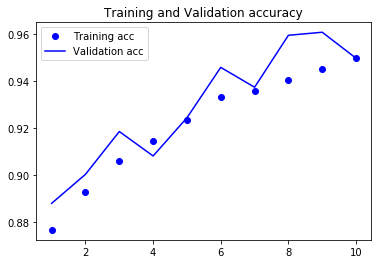

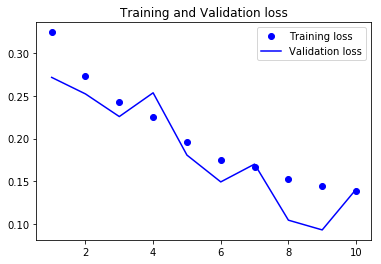

Figure weed_detect_1_training saved


<Figure size 432x288 with 0 Axes>

In [105]:
plot_training(history)
save_fig('weed_detect_1_training')

In [0]:
# Custom activation function
#from keras.layers import Activation
#from keras import backend as K
#from keras.utils.generic_utils import get_custom_objects


#def mish(x):
#    return x*K.tanh(K.softplus(x))

#get_custom_objects().update({'mish': Activation(mish)})

In [107]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(200,200),
    batch_size=1,
    shuffle=False)


Found 1532 images belonging to 4 classes.


In [108]:
result = model.evaluate_generator(test_generator, verbose=1)

print("Loss : {0:.2f}".format(result[0]))
print("Accuracy : {0:.2f} %".format(result[1]*100))

1532/1532 [==============================] - 10s 6ms/step
Loss : 0.15
Accuracy : 94.45 %


In [129]:
y_pred = model.predict_generator(test_generator, verbose=1)  
y_true = test_generator.classes

1532/1532 [==============================] - 9s 6ms/step


In [0]:
y_pred=y_pred.argmax(axis=1)

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,y_pred)

0.9445169712793734

In [0]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    # print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

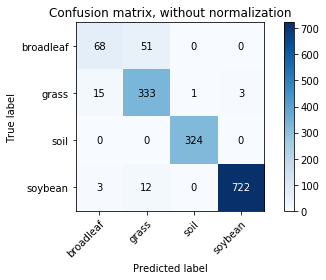

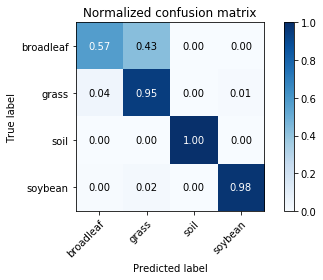

In [121]:
classes=np.array(['broadleaf','grass','soil','soybean'])
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
def image_index_random(nbr_img):
    name_image=[]
    nbr_index=[]
    for i in range(nbr_img):
        unique=True
        files = test_generator.filenames
        while unique:
            index = random.randrange(0, len(files))
            if index not in nbr_index:
                nbr_index.append(index)
                unique=False
        name_image.append(files[index])
    return name_image,nbr_index

In [0]:
image,index=image_index_random(10)

In [0]:
class_map = {v: k for k, v in test_generator.class_indices.items()}

In [147]:
class_map

{0: 'broadleaf', 1: 'grass', 2: 'soil', 3: 'soybean'}

In [0]:
def visualization_pred(files,index,sizeh,sizev,y_true,y_pred):
    length=len(files)
    plt.figure(figsize=(sizeh,sizev))
    for each in range(len(files)):
        div=np.ceil(length/2)
        plt.subplot(div,div,each+1)
        imgplot=mpimg.imread(test_dir+'/'+files[each])
        plt.imshow(imgplot,cmap='gray')
        true = class_map[y_true[index[each]]]
        predicted = class_map[y_pred[index[each]]]
        if int(y_true[index[each]])==int(y_pred[index[each]]):
            plt.title("True: "+ true+"\n"+"Pred: "+ predicted,color='g')
        else:
            plt.title("True: "+ true+"\n"+"Pred: "+ predicted,color='r')
    plt.tight_layout()
    save_fig('Prediction_Images')
    plt.show()

Figure Prediction_Images saved


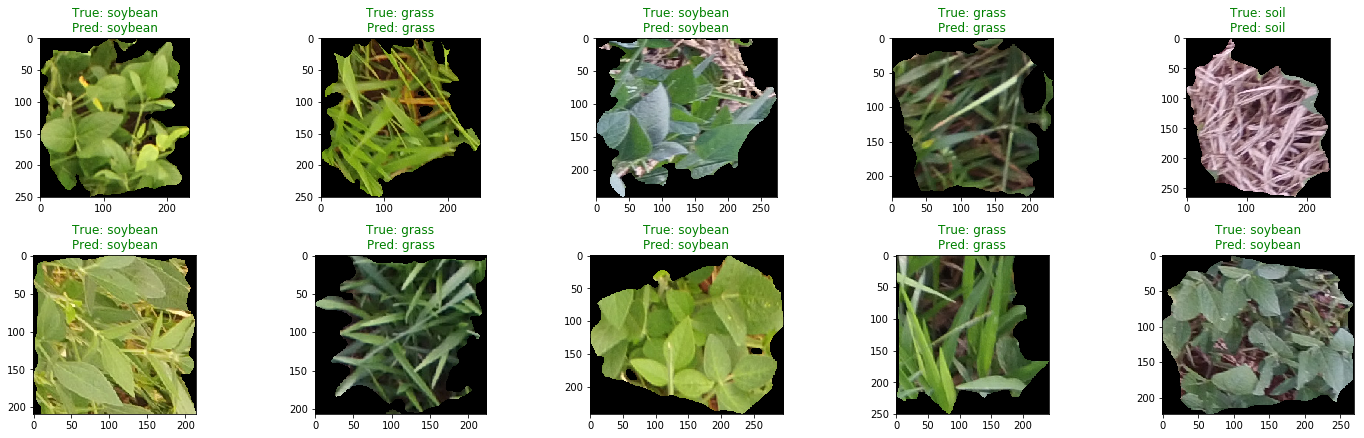

Figure predict_result_image saved


<Figure size 432x288 with 0 Axes>

In [149]:
visualization_pred(image,index,20,15,y_true,y_pred)
save_fig('predict_result_image')